In [8]:
using DataFrames, CSV
using StatsPlots, Plots

In [3]:
pathToDir = "./LogN_a_2a_LogN_b_2b/"
files = []
labels = []
for f in readdir(pathToDir)
    if endswith(f, ".csv")
        push!(files, pathToDir * f)
        push!(labels, f[1:first(findlast("_", f))-1])
    end
end
@show files[1]
labels

files[1] = "./LogN_a_2a_LogN_b_2b/bs_pooled_0.05.csv"


8-element Vector{Any}:
 "bs_pooled"
 "bs_unpooled"
 "oneSided_pooled"
 "oneSided_unpooled"
 "t_pooled"
 "t_unpooled"
 "twoSided_pooled"
 "twoSided_unpooled"

In [19]:
files[3:4], files[5:6] = files[5:6], files[3:4]
labels[3:4], labels[5:6] = labels[5:6], labels[3:4]
labels

(Any["t_pooled", "t_unpooled"], Any["oneSided_pooled", "oneSided_unpooled"])

In [21]:
dataframes = [DataFrame(CSV.File(f)) for f in files];

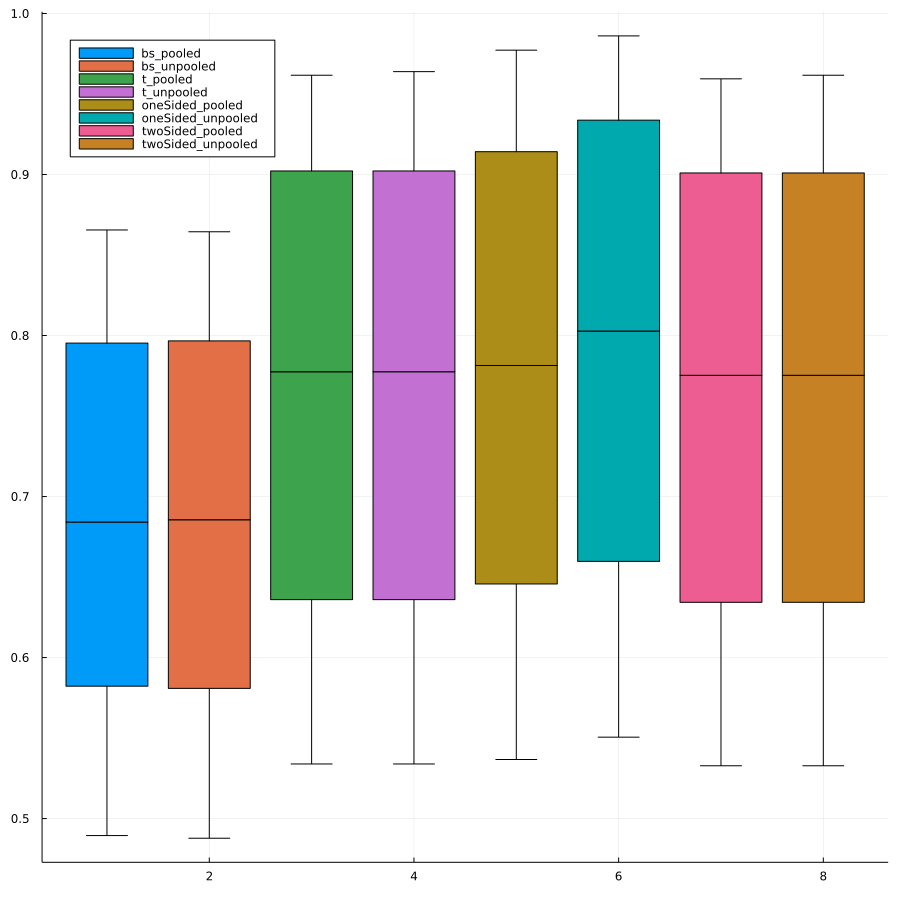

In [22]:
boxplots = boxplot([df.prob for df in dataframes], label=hcat(labels...), legend = :topleft)
plot!(size=(900, 900))

In [23]:
savefig(boxplots, pathToDir * "boxplot.png")

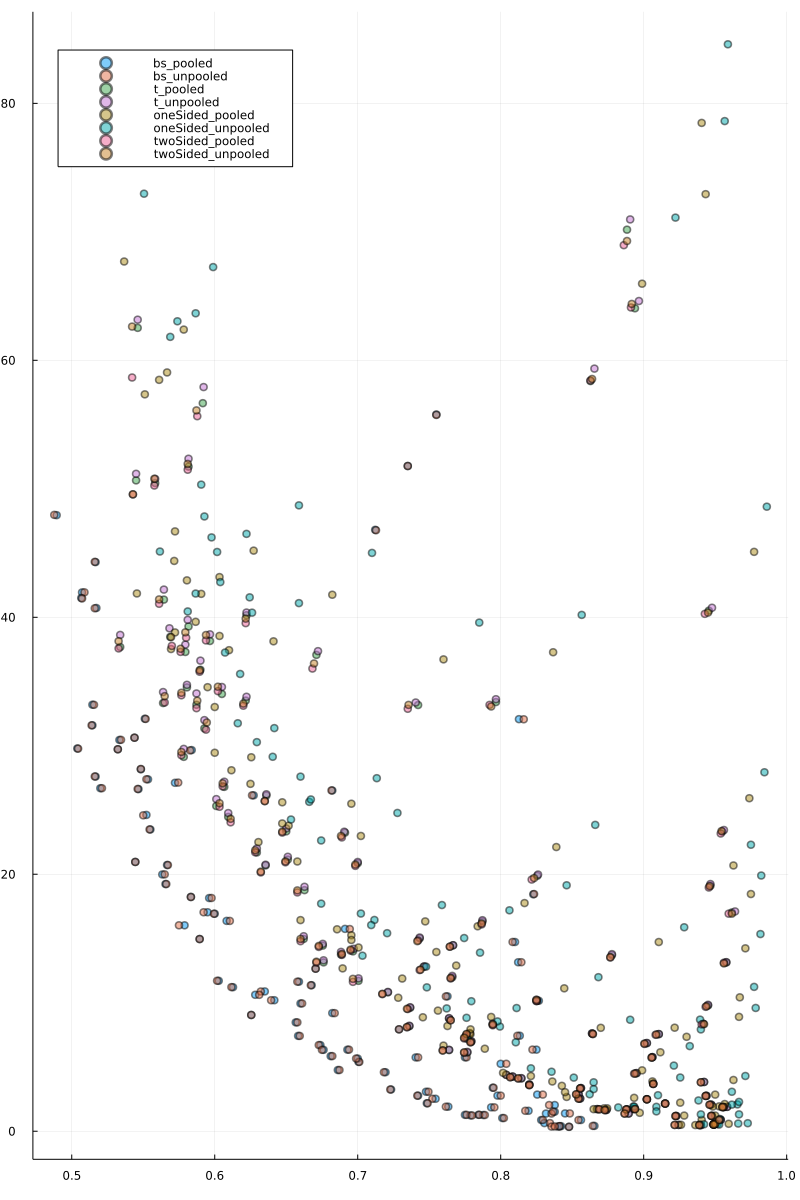

In [39]:
scatterPlot = scatter([(df.prob, df.width) for df in dataframes], label=hcat(labels...),
                      legend = :topleft, markeralpha = 0.5)
plot!(size=(800, 1200))

In [40]:
savefig(scatterPlot, pathToDir * "scatter.png")